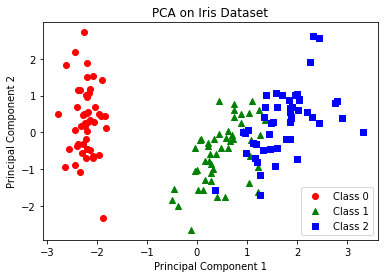

In [5]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris

# import iris dataset
# iris = load_iris()
# X = iris.data
# y = iris.target

# IF YOU WANT TO LOAD DATASET FROM CSV FILE :
iris_df = pd.read_csv('iris_dataset.csv')
X = iris_df.drop(columns=['Id','Species'], axis=1)
iris_df['Species'] = iris_df['Species'].replace({'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2})
y = iris_df['Species']

# Standardize the data
mean = np.mean(X, axis=0)
std_dev = np.std(X, axis=0)
X_standardized = (X - mean) / std_dev

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_standardized)

# Visualize the results
colors = ['red', 'green', 'blue']
markers = ['o', '^', 's']

for i in range(3):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], color=colors[i], marker=markers[i], label=f'Class {i}')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA on Iris Dataset')
plt.legend()
plt.show()

Explained Variance Ratio: [0.72226528 0.23974795]
Confusion Matrix:
[[11  0  0]
 [ 0 10  3]
 [ 0  1  5]]
Accuracy score:
0.8666666666666667


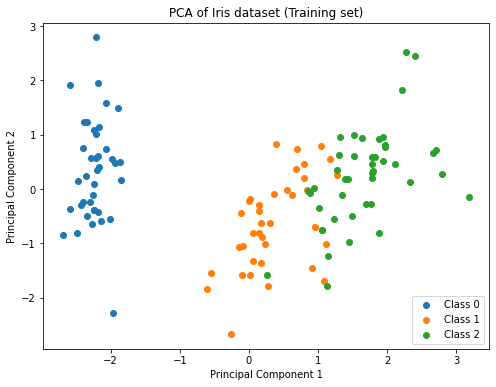

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score

# import iris dataset
# iris = load_iris()
# X = iris.data
# y = iris.target

# IF YOU WANT TO LOAD DATASET FROM CSV FILE :
iris_df = pd.read_csv('iris_dataset.csv')
X = iris_df.drop(columns=['Id','Species'], axis=1)
iris_df['Species'] = iris_df['Species'].replace({'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2})
y = iris_df['Species']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Standardizing the features
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Applying PCA with 2 components
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
print("Explained Variance Ratio:", pca.explained_variance_ratio_)

# Fitting Logistic Regression to the training set
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train_pca, y_train)

# Predicting the test set results
y_pred = classifier.predict(X_test_pca)

# Creating confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

#Accuracy Score
acc = accuracy_score(y_test,y_pred)
print("Accuracy score:")
print(acc)

# Visualizing the training set results
plt.figure(figsize=(8, 6))
for i in range(len(np.unique(y_train))):
    plt.scatter(X_train_pca[y_train == i, 0], X_train_pca[y_train == i, 1], label=f'Class {i}')
plt.title('PCA of Iris dataset (Training set)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()